# Data Exploration for the Tabular Data from the files in the Structured Data Folder

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import rcParams
from pathlib import Path

In [2]:
rcParams.update({"font.size": 6})
rcParams["svg.fonttype"] = "none"

## Load the Data

In [3]:
data_dir = Path.cwd() / '..' / '..' / 'Hancock_Dataset' / 'StructuredData'

In [4]:
clinical = pd.read_json(data_dir/"clinical_data.json", dtype={"patient_id": str})
patho = pd.read_json(data_dir/"pathological_data.json", dtype={"patient_id": str})
blood = pd.read_json(data_dir/"blood_data.json", dtype={"patient_id": str})
ref = pd.read_json(data_dir/"blood_data_reference_ranges.json").drop(["LOINC_name"], axis=1)

## Pathological Data

### Primary Tumor Site
Data type: object

Meaning: In the context of cancer, the primary tumor site refers to the **original anatomical location** where cancer cells first arise and begin to grow uncontrollably. It's the initial point of origin for the cancerous process. [National Cancer Institute](https://www.cancer.gov/publications/dictionaries/cancer-terms/def/primary-tumor)

Values: CUP, Hypopharynx, Larynx, Oral_Cavity, Oropharynx
- CUP: Cancer of unknown primary means that cancer spread (secondary cancer) has been found in the body, but doctors don't know where the cancer started (the primary tumor) [Cancer Research UK](https://www.cancerresearchuk.org/about-cancer/cancer-unknown-primary-cup/about)
- Hypopharynx: Unter einem **Hypopharynxkarzinom** versteht man einen [malignen](https://flexikon.doccheck.com/de/Maligne) [Tumor](https://flexikon.doccheck.com/de/Tumor) im Bereich des [Hypopharynx](https://flexikon.doccheck.com/de/Hypopharynx) (unterer Schlundbereich). Das Hypopharynxkarzinom ist eine Form des [Larynxkarzinoms](https://flexikon.doccheck.com/de/Larynxkarzinom). [DocFlex](https://flexikon.doccheck.com/de/Hypopharynxkarzinom)
- Oral Cavity: The oral cavity, or more commonly known as the mouth or buccal cavity, serves as the first portion of the digestive system. It consists of several different anatomically different aspects that work together effectively and efficiently to perform several functions. These aspects include the lips, tongue, palate, and teeth. Although a small compartment, the oral cavity is a unique and complex structure with several different nerves and blood vessels inside it. [Anatomy, Head and Neck, Ora Cavity](https://pubmed.ncbi.nlm.nih.gov/31424855/)
- Oropharynx: The middle part of the throat, behind the mouth. The oropharynx includes the soft palate (the back muscular part of the roof of the mouth), the side and back walls of the throat, the tonsils, and the back one-third of the tongue. [National Cancer Institute](https://www.cancer.gov/publications/dictionaries/cancer-terms/def/oropharynx)


In [5]:
site = patho["primary_tumor_site"].value_counts().sort_values()
site.index = site.index.str.replace('_', ' ')
site

primary_tumor_site
CUP              2
Hypopharynx     89
Oral Cavity    134
Larynx         207
Oropharynx     331
Name: count, dtype: int64

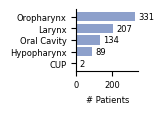

In [6]:
plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(site.index, site.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel("# Patients", fontsize=6)
plt.show()

### Staging
#### pT-Stage
Data type: object

Meaning: The TNM staging system stands for Tumor, Node, Metastasis. T describes the size of the tumor and how far it has spread into nearby tissue. It can be 1, 2, 3 or 4, with 1 being small and 4 large [Cancer Research UK](https://www.cancerresearchuk.org/about-cancer/what-is-cancer/stages-of-cancer). 

Values: 'pT4a', 'pT2', 'pT1', 'pT3', 'pT1b', 'pTis', 'pT1a', 'pT4b', 'TX'
- **pT4a:** This is a subcategory within pT4. The specific distinction between pT4a and pT4b (which might exist depending on the specific cancer type) can vary. However, in some cases, pT4a might indicate that the tumor has **infiltrated neighboring organs**.
    
- **pT4is (pT4 in situ):** This is less common, but it can be used in some cancer types to describe a situation where the tumor is very large and **approaches or involves surrounding structures**, but hasn't demonstrably invaded them yet.
    
- **TX:** This code signifies that the **primary tumor cannot be assessed** due to limitations or lack of information. This could be because the tumor is hidden or inaccessible for examination, or there's insufficient data available

In [7]:
tstage = patho["pT_stage"].replace({"pT4a": "pT4", "pT4b": "pT4", "pT1a": "pT1", "pT1b": "pT1"}).value_counts().sort_values()
tstage = tstage.sort_values(ascending=True)

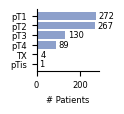

In [8]:
plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(tstage.index, tstage.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel("# Patients", fontsize=6)
plt.show()

#### pN-Stage
Data Type: object

Meaning: The TNM staging system stands for Tumor, Node, Metastasis. N refers to whether the cancer has spread to the lymph nodes. It can be between 0 and 3. 0 means that there are no lymph nodes containing cancer cells. And 3 means that here are lots of lymph nodes containing cancer cells. [Cancer Research UK](https://www.cancerresearchuk.org/about-cancer/what-is-cancer/stages-of-cancer)

Values: 'pN2b', 'pN2c', 'pN1', 'pN0', 'NX', 'pN3b', 'pN1a', 'pN2a', 'pN2', 'pN3'
- **pNx:** This code signifies that the **lymph nodes cannot be assessed**. This could be due to several reasons, such as:
    - The lymph nodes were not removed or biopsied during surgery.
    - Imaging tests were inconclusive for lymph node involvement.
    - The location of the primary tumor makes it difficult to assess the lymph nodes.
- **pN with additional letters (a, b, c):** In some cancer types, the pN stage might be further sub-categorized using letters (a, b, c) to provide more granular details about the extent of lymph node involvement. The specific meaning of these letters can vary depending on the cancer type.

In [9]:
nstage = patho["pN_stage"].apply(lambda x: "xNX" if x=="NX" else str(x)[:3]).value_counts().sort_values()
nstage = nstage.sort_index(ascending=False)

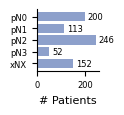

In [10]:
plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(nstage.index, nstage.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel("# Patients", fontsize=8)
plt.show()

### Grading
Data Type: object

Meaning: In most cases, doctors need to study a sample of tissue from the tumor to decide if it is cancer and, if it is, its grade. They obtain this tissue by doing a biopsy, a procedure in which they remove all or part of the tumor. A specialist called a [pathologist](https://www.cancer.gov/Common/PopUps/popDefinition.aspx?id=CDR0000046244&version=Patient&language=en) determines the grade of your tumor by studying samples from the biopsy under a microscope. The pathologist describes the findings in a [pathology report](https://www.cancer.gov/Common/PopUps/popDefinition.aspx?id=CDR0000044702&version=Patient&language=en), which also contains other details about your diagnosis. 
Cells that look more normal might be called well-differentiated in the pathology report. And cells that look less normal might be called poorly differentiated or undifferentiated. Based on these and other features of how cells look under the microscope, the pathologist will assign a number to describe the grade.

Values:
Systems for describing tumor grade can differ depending on the type of cancer. But most tumors are graded as X, 1, 2, 3, or 4. 
- Grade X: Grade cannot be assessed (undetermined grade)
- Grade 1: Well differentiated (low grade)
- Grade 2: Moderately differentiated (intermediate grade)
- Grade 3: Poorly differentiated (high grade)
- Grade 4: Undifferentiated (high grade)
- 'hpv_association_p16' [PubMed](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10124586/): 
	- **p16:** This is a protein that acts as a tumor suppressor. In some cancers, particularly HNSCC, loss of p16 function can be a marker for HPV infection. A test can be performed to assess p16 expression in tumor cells.
	- **HPV:** Certain strains of HPV, particularly HPV16 and HPV18, are known risk factors for some cancers, including a subset of HNSCC. HPV infection can disrupt the p16 protein, leading to its loss of function.


In [11]:
grading = patho.grading.replace("hpv_association_p16", "HPV+").value_counts()[["HPV+", "G3", "G2", "G1"]]
grading

grading
HPV+    141
G3      370
G2      236
G1       16
Name: count, dtype: int64

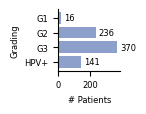

In [12]:

plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(grading.index, grading.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel("# Patients", fontsize=6)
plt.ylabel("Grading", fontsize=6)
plt.show()

### HPV Association p16
Data type: object

Meaning: The p16 protein is a indirect marker for the human papillomavirus. [PubMed](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10124586/)

Values: 'not_tested', 'positive', 'negative'

In [13]:
hpv_association_16 = patho['hpv_association_p16'].value_counts()
hpv_association_16

hpv_association_p16
not_tested    431
negative      191
positive      141
Name: count, dtype: int64

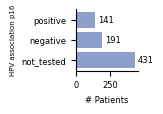

In [14]:
plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(hpv_association_16.index, hpv_association_16.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel('# Patients', fontsize=6)
plt.ylabel('HPV association p16', fontsize=5)
plt.show()

### Number of positive lymph nodes
Data type: Float64

Meaning: Refer to lymph nodes that contain cancer cells. [PubMed](https://pubmed.ncbi.nlm.nih.gov/23229885/)

Values:  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 23., 25., 26., 28., 33., 38., 52., nan

In [15]:
num_pos_lymp_nodes = patho['number_of_positive_lymph_nodes'].value_counts()\
    .sort_index()
sum_nan = np.sum(np.isnan(patho['number_of_positive_lymph_nodes']))

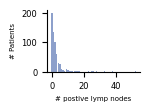

In [16]:
plt.figure(figsize=(1.2, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.bar(num_pos_lymp_nodes.index.to_list(), num_pos_lymp_nodes.values, color=color)
sns.despine()
plt.xlabel('# postive lymp nodes', fontsize=5)
plt.ylabel('# Patients', fontsize=5)
plt.show()

### Number of resected lymph nodes
Data type: int64

Meaning: A lymph node dissection is surgery to remove an area of lymph nodes. It is done to remove lymph nodes that have cancer and other lymph nodes when there is a very high chance that the cancer may spread there. It is also called a lymphadenectomy. [Canadian Cancer Society](https://cancer.ca/en/treatments/tests-and-procedures/lymph-node-dissection)

Values: 0,  1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       72, 74, 78, 79, 90, 93

In [17]:
res_lymph_nodes = patho['number_of_resected_lymph_nodes'].value_counts().sort_index()

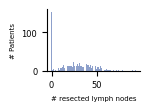

In [18]:
plt.figure(figsize=(1.2, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.bar(res_lymph_nodes.index.to_list(), res_lymph_nodes.values, color=color)
sns.despine()
plt.xlabel('# resected lymph nodes', fontsize=5)
plt.ylabel('# Patients', fontsize=5)
plt.show()

### Perinodal Invasion
Data type: Object

Meaning: If "perinodal" refers to tissue surrounding a lymph node (nodal being related to lymph nodes), it could be a less common way to describe the area near a lymph node. However, there's no established term for "perinodal invasion" in this context. Cancer spread to lymph nodes is typically referred to as lymph node metastasis.

Values:'yes', 'no', None

In [19]:
perinodal_invasion = patho['perinodal_invasion'].apply(lambda x: 'None' if x == None else x).value_counts()

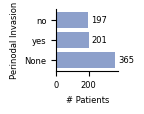

In [20]:
plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(perinodal_invasion.index, perinodal_invasion.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel("# Patients", fontsize=6)
plt.ylabel("Perinodal Invasion", fontsize=6)
plt.show()

### Lymphovascular Invasion
Data type: Object

Meaning: Lymphovascular invasion (LVI or lymphovascular space invasion) is the invasion of a cancer to the blood vessels and/or lymphatics. [Wiki](https://en.wikipedia.org/wiki/Lymphovascular_invasion)

Values:'yes', 'no'

In [21]:
lymphovascular_invasion = patho['lymphovascular_invasion_L'].value_counts()

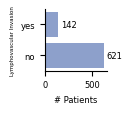

In [22]:
plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(lymphovascular_invasion.index, lymphovascular_invasion.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel("# Patients", fontsize=6)
plt.ylabel("Lymphovascular Invasion", fontsize=4)
plt.show()

### Vascular Invasion V
Data type: Object

Meaning: Before a cancer can spread to the rest of the body, it has to get into the channels that go through the rest of the body; that's lymph channels or blood channels, particularly the venous system. If the cell gets into the veins, it can go to the heart, and the heart can pump those cells to the rest of the body; and it might grow in those places. [abc News](https://abcnews.go.com/Health/OnCallPlusScreeningAndDiagnosis/story?id=4807831)

Values: 'no', 'yes'

In [23]:
vascular_invastion = patho['vascular_invasion_V'].value_counts()

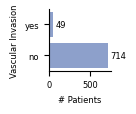

In [24]:
plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(vascular_invastion.index, vascular_invastion.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel("# Patients", fontsize=6)
plt.ylabel("Vascular Invasion", fontsize=6)
plt.show()

### Perineural Invasion
Data types: Object

Meaning: Perineural invasion (PNI) can be found in a variety of malignant tumors. It is a sign of tumor metastasis and invasion and portends the poor prognosis of patients [PubMed](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6356921/)

Values: 'no', 'yes'

In [25]:
perineural_invasion = patho['perineural_invasion_Pn'].value_counts()

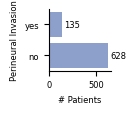

In [26]:
plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(perineural_invasion.index, perineural_invasion.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel("# Patients", fontsize=6)
plt.ylabel('Perineural Invasion', fontsize=6)
plt.show()

### Resection Status
Data type: Object

Meaning:
- R0 resection: Removal of tumor in healthy tissue. No tumor tissue is seen in the resection margin on histopathology.
- R1 resection: Tumor is macroscopically removed. However, histopathology shows smaller pieces of tumor in the resection margin.
- R2 resection: Larger, macroscopically visible parts of the tumor could not be resected (preservation of vital structures).
- RX: This is a code used in tumor reporting systems (like the AJCC TNM staging system) to signify an "unable to assess" situation.
- en bloc resection: removal with adjacent organs.

Values: 'R0', 'R1', 'R2', 'RX'

In [27]:
resection_status = patho['resection_status'].value_counts()
resection_status

resection_status
R0    685
R1     51
RX     25
R2      2
Name: count, dtype: int64

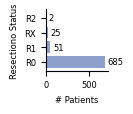

In [28]:
plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(resection_status.index, resection_status.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel("# Patients", fontsize=6)
plt.ylabel("Resectiono Status", fontsize=6)
plt.show()

### Resection Status Carcinoma in situ
Data type:

Meaning:
- CIS (Carcinoma in situ): This refers to a condition where abnormal cells are present within the tissue layer they originated from (in situ means "in place"). These cells have the potential to become invasive cancer but haven't yet breached the basement membrane (a barrier separating tissues).
- CIS Absent: This indicates that no carcinoma in situ (CIS) cells were identified in the resected tissue sample. This is a positive finding, suggesting complete removal of the abnormal cells.
- Ris0 (Risk 0): This could signify a very low risk of CIS recurrence. It's a favorable outcome, suggesting a low chance of the abnormal cells returning.
- Ris1 (Risk 1): This might indicate a low risk of CIS recurrence. It's still a positive outcome, but the risk is slightly higher than Ris0.

Values: 'CIS Absent', 'Ris0', 'Ris1'

In [29]:
resection_status_in_situ = patho['resection_status_carcinoma_in_situ'].value_counts()
resection_status_in_situ

resection_status_carcinoma_in_situ
CIS Absent    471
Ris0          279
Ris1           13
Name: count, dtype: int64

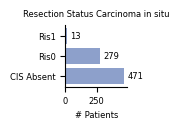

In [30]:
plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(resection_status_in_situ.index, resection_status_in_situ.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel("# Patients", fontsize=6)
plt.title("Resection Status Carcinoma in situ", fontsize=6)
plt.show()

### Carcinoma in situ
Data type: Object  

Meaning: This refers to a condition where abnormal cells are present within the tissue layer they originated from (in situ means "in place"). These cells have the potential to become invasive cancer but haven't yet breached the basement membrane (a barrier separating tissues).

Values: 'no', 'yes'

In [31]:
carcinoma_in_situ = patho['carcinoma_in_situ'].value_counts()

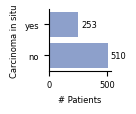

In [32]:
plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(carcinoma_in_situ.index, carcinoma_in_situ.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel("# Patients", fontsize=6)
plt.ylabel("Carcinoma in situ", fontsize=6)
plt.show()

### Tumor resection margin
Data type: Object

Meaning: A resection margin or surgical margin is the margin of apparently non-tumorous tissue around a tumor that has been surgically removed, called "resected", in surgical oncology. The resection is an attempt to remove a cancer tumor so that no portion of the malignant growth extends past the edges or margin of the removed tumor and surrounding tissue. These are retained after the surgery and examined microscopically by a pathologist to see if the margin is indeed free from tumor cells (called "negative"). If cancerous cells are found at the edges (called "positive") the operation is much less likely to achieve the desired results. [Wiki](https://en.wikipedia.org/wiki/Resection_margin)

Values: '<0.1', None, '0.5', '0.3', '0.2', '0', '0.1', '1.1', '0.4', '1.2',
       '0.6', '0.7', '0.8', '1.3', '1' 

In [33]:
margin_r = patho[["closest_resection_margin_in_cm"]].copy()

In [34]:
margin_r["grouped"] = margin_r.closest_resection_margin_in_cm.replace({
    "<0.1": "]0, 0.1[",
    "0.1": "[0.1, 0.4]", "0.2": "[0.1, 0.4]", "0.3": "[0.1, 0.4]", "0.4": "[0.1, 0.4]",
    "0.5": "> 0.4", "0.6": "> 0.4", "0.7": "> 0.4", "0.8": "> 0.4", "0.9": "> 0.4", "1": "> 0.4", "1.1": "> 0.4", "1.2": "> 0.4", "1.3": "> 0.4", 
})
margin_grouped = margin_r.grouped.value_counts()

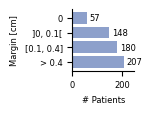

In [35]:
plt.figure(figsize=(0.8, 0.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(margin_grouped.index, margin_grouped.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
plt.xlim([0,250])
sns.despine()
plt.xlabel("# Patients", fontsize=6)
plt.ylabel("Margin [cm]", fontsize=6)
plt.show()

### Histological Type
Data type: Object

Meaning: 
Squamous Cell Carcinoma (SCC):  These are the most common types in the list (all starting with "SCC_").  They arise from squamous cells, which are flat, scale-like cells found on the surface of the skin and other organs.  Within SCC, there are various subtypes based on specific characteristics.
- SCC_Basaloid: This type of SCC has cells that resemble basal cells, which are the deeper cells in the squamous epithelium.
- SCC_Conventional-Keratinizing: This is a common type of SCC where the tumor cells produce keratin, a protein that gives skin its tough, protective layer.
- SCC_Conventional-NonKeratinizing: This type of SCC does not produce significant amounts of keratin.
- SCC_Sarcomatoid: This is a rare and aggressive type of SCC where the tumor cells show features of both epithelial (squamous) and mesenchymal (connective) tissues.
- Neuroendocrine Carcinoma: This is a type of cancer arising from cells that have features of both nerve cells and hormone-producing cells.
- SCC_Acantholytic: This type of SCC shows a loss of cell adhesion, where the tumor cells detach from each other easily.
- SCC_Lymphoepithelial Carcinoma: This is a rare type of SCC with features of both squamous epithelium and lymphoid tissue (immune system cells).
- Mucoepidermoid Carcinoma: This is a type of malignant tumor that can arise in various glands throughout the body. It can produce mucus and other secretions
- None: This indicates the histological type is missing from the data.

Values: 'SCC_Basaloid', 'SCC_Conventional-Keratinizing',
       'SCC_Conventional-NonKeratinizing', None, 'SCC_Sarcomatoid',
       'Neuroendocrine_Carcinoma', 'SCC_Acantholytic',
       'SCC_Lymphoepithelial', 'Mucoepidermoid_Carcinoma'

In [36]:
histo_type = patho['histologic_type'].value_counts()

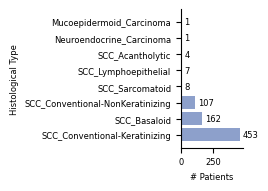

In [37]:
plt.figure(figsize=(0.8, 1.8))
color = sns.color_palette("Set2")[2]
ax = plt.barh(histo_type.index, histo_type.values, color=color)
plt.bar_label(ax, padding=2, fontsize=6)
sns.despine()
plt.xlabel("# Patients", fontsize=6)
plt.ylabel("Histological Type", fontsize=6)
plt.show()

### Tumor Infiltration Depth
Data type: Float64

Meaning: Tumor infiltration depth (TID) focuses more on the location of the tumor within an organ and how deeply it has invaded surrounding tissues, rather than the overall size of the tumor itself. Here's why:
- Focus on Spread: TID emphasizes the extent of cancer spread by measuring how far the tumor cells have penetrated into deeper structures.
- Organ-Specific: The reference point for TID measurement is often based on the specific anatomy of the organ where the tumor originates. For instance, in skin cancer, the starting point is the skin surface, while in some gastrointestinal cancers, it might be the muscularis mucosa (a deeper layer).
- Not a Direct Size Measure: While a larger tumor might generally have a greater infiltration depth, TID doesn't directly correlate to the overall tumor size or thickness. A smaller tumor can have a deeper infiltration if it grows aggressively into surrounding tissues.

Values: 0.  ,  0.5 ,  1.  ,  1.5 ,  2.  ,  2.5 ,  2.8 ,  3.  ,  3.5 ,
        3.95,  4.  ,  4.5 ,  5.  ,  5.5 ,  6.  ,  7.  ,  8.  ,  9.  ,
       10.  , 11.  , 12.  , 13.  , 14.  , 15.  , 16.  , 17.  , 18.  ,
       19.  , 20.  , 21.  , 22.  , 23.  , 24.  , 25.  , 27.  , 28.  ,
       30.  , 35.  , 38.  , 40.  , 42.  , 45.  , 50.  , 53.  ,   nan

In [38]:
infiltration_depth = patho['infiltration_depth_in_mm']
bins_age = np.arange(infiltration_depth.min(), infiltration_depth.max()+1, 3)

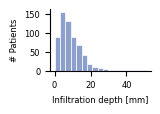

In [39]:
plt.figure(figsize=(1.3,0.8))
plt.hist(infiltration_depth, bins=bins_age, edgecolor="white", color=sns.color_palette("Set2")[2], linewidth=0.5)
plt.yticks([0,50,100,150])
sns.despine()
plt.xlabel("Infiltration depth [mm]", fontsize=6)
plt.ylabel("# Patients", fontsize=6)
plt.show()

## Clinical Data

In [40]:
clinical.columns

Index(['patient_id', 'year_of_initial_diagnosis', 'age_at_initial_diagnosis',
       'sex', 'smoking_status', 'primarily_metastasis', 'survival_status',
       'survival_status_with_cause', 'days_to_last_information',
       'first_treatment_intent', 'first_treatment_modality',
       'days_to_first_treatment', 'adjuvant_treatment_intent',
       'adjuvant_radiotherapy', 'adjuvant_radiotherapy_modality',
       'adjuvant_systemic_therapy', 'adjuvant_systemic_therapy_modality',
       'adjuvant_radiochemotherapy', 'recurrence', 'days_to_recurrence',
       'progress_1', 'days_to_progress_1', 'progress_2', 'days_to_progress_2',
       'metastasis_1_locations', 'days_to_metastasis_1',
       'metastasis_2_locations', 'days_to_metastasis_2',
       'metastasis_3_locations', 'days_to_metastasis_3',
       'metastasis_4_locations', 'days_to_metastasis_4'],
      dtype='object')

### Years of Initial Diagnosis
Data type: int64

Meaning: Year in which the patient got initial diagnosed with cancer.

Values: 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019

In [41]:
years_initial_diagnosis = clinical['year_of_initial_diagnosis']
bins_years = np.arange(years_initial_diagnosis.min(), years_initial_diagnosis.max() + 1, 2)

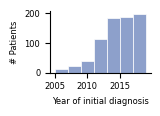

In [42]:
plt.figure(figsize=(1.3,0.8))
plt.hist(years_initial_diagnosis, bins=bins_years, edgecolor="white", color=sns.color_palette("Set2")[2], linewidth=0.5)
sns.despine()
plt.xlabel("Year of initial diagnosis", fontsize=6)
plt.ylabel("# Patients", fontsize=6)
plt.show()

### Age at Initial Diagnosis
Data type: Int64

Meaning: Age of the patient when the initial get diagnosed with cancer. 

Values: 22 26 30 34 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79
 80 81 82 83 84 85 88 90 92

In [43]:
age = clinical["age_at_initial_diagnosis"]
bins_age = np.arange(clinical["age_at_initial_diagnosis"].min(), 
                     clinical["age_at_initial_diagnosis"].max() + 1, 5)

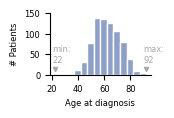

In [44]:
plt.figure(figsize=(1.3,0.8))
plt.hist(age, bins=bins_age, edgecolor="white", color=sns.color_palette("Set2")[2])
sns.despine()
plt.ylim([0,150])
plt.xlabel("Age at diagnosis", fontsize=6)
plt.ylabel("# Patients", fontsize=6)
plt.plot(age.min(), 15, "v", color="darkgray", markersize=3)
plt.plot(age.max(), 15, "v", color="darkgray", markersize=3)
plt.text(s=f"min:\n{age.min()}", x=20, y=30, color="darkgray")
plt.text(s=f"max:\n{age.max()}", x=90, y=30, color="darkgray")
plt.show()